# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
tf.__version__

'2.20.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
import os
import re
import random
from PIL import Image
from shutil import copy2


# --- Source paths ---
images_dir = r"Downloads/ML Test/CNN/Mask/train/images"   
labels_dir = r"Downloads/ML Test/CNN/Mask/train/labels"   

# --- Output folders ---
output_dir = os.path.abspath(r"Downloads/ML Test/CNN/Mask/output")

# --- Class mapping ---
class_names = ["mask_correct", "mask_incorrect", "no_mask"]


# STEP 1: Crop YOLO-labeled regions

print("🔄 Step 1: Cropping YOLO-labeled images...")

os.makedirs(output_dir, exist_ok=True)
for cls_name in class_names:
    os.makedirs(os.path.join(output_dir, cls_name), exist_ok=True)

counter = 0

for img_file in os.listdir(images_dir):
    if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_name = os.path.splitext(img_file)[0]
    img_path = os.path.join(images_dir, img_file)
    label_path = os.path.join(labels_dir, img_name + ".txt")

    if not os.path.exists(label_path):
        continue

    try:
        with Image.open(img_path) as img:
            w, h = img.size

            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue

                    cls, x_center, y_center, bbox_w, bbox_h = map(float, parts)
                    cls = int(cls)

                    # Convert normalized YOLO coords to pixel coords
                    x_center *= w
                    y_center *= h
                    bbox_w *= w
                    bbox_h *= h

                    x1 = int(x_center - bbox_w / 2)
                    y1 = int(y_center - bbox_h / 2)
                    x2 = int(x_center + bbox_w / 2)
                    y2 = int(y_center + bbox_h / 2)

                    # Clip to valid range
                    x1, y1 = max(0, x1), max(0, y1)
                    x2, y2 = min(w, x2), min(h, y2)
                    if x2 <= x1 or y2 <= y1:
                        continue

                    cropped = img.crop((x1, y1, x2, y2))
                    label_name = class_names[cls]
                    save_dir = os.path.join(output_dir, label_name)
                    os.makedirs(save_dir, exist_ok=True)

                    # Sanitize and shorten filename to avoid Windows path errors
                    safe_name = re.sub(r"[^a-zA-Z0-9_.-]", "_", img_file)
                    safe_name = safe_name[-100:]  # limit length
                    save_path = os.path.join(save_dir, safe_name)

                    cropped.save(save_path)
                    counter += 1

    except Exception as e:
        print(f"⚠️ Skipping {img_file}: {e}")

print(f"✅ Step 1 complete! Saved {counter} cropped images to {output_dir}\n")


🔄 Step 1: Cropping YOLO-labeled images...
✅ Step 1 complete! Saved 5957 cropped images to C:\Users\DELL\Downloads\ML Test\CNN\Mask\output



In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Downloads/ML Test/CNN/Mask/output/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2148 images belonging to 3 classes.


### Preprocessing the Test set

In [13]:
import os
import re
import random
from PIL import Image
from shutil import copy2


# --- Source paths ---
images_dir = r"Downloads/ML Test/CNN/Mask/test/images"   
labels_dir = r"Downloads/ML Test/CNN/Mask/test/labels"   

# --- Output folders ---
output_dir = os.path.abspath(r"Downloads/ML Test/CNN/Mask/output/test")

# --- Class mapping ---
class_names = ["mask_correct", "mask_incorrect", "no_mask"]


# STEP 1: Crop YOLO-labeled regions

print("🔄 Step 1: Cropping YOLO-labeled images...")

os.makedirs(output_dir, exist_ok=True)
for cls_name in class_names:
    os.makedirs(os.path.join(output_dir, cls_name), exist_ok=True)

counter = 0

for img_file in os.listdir(images_dir):
    if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_name = os.path.splitext(img_file)[0]
    img_path = os.path.join(images_dir, img_file)
    label_path = os.path.join(labels_dir, img_name + ".txt")

    if not os.path.exists(label_path):
        continue

    try:
        with Image.open(img_path) as img:
            w, h = img.size

            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    if len(parts) != 5:
                        continue

                    cls, x_center, y_center, bbox_w, bbox_h = map(float, parts)
                    cls = int(cls)

                    # Convert normalized YOLO coords to pixel coords
                    x_center *= w
                    y_center *= h
                    bbox_w *= w
                    bbox_h *= h

                    x1 = int(x_center - bbox_w / 2)
                    y1 = int(y_center - bbox_h / 2)
                    x2 = int(x_center + bbox_w / 2)
                    y2 = int(y_center + bbox_h / 2)

                    # Clip to valid range
                    x1, y1 = max(0, x1), max(0, y1)
                    x2, y2 = min(w, x2), min(h, y2)
                    if x2 <= x1 or y2 <= y1:
                        continue

                    cropped = img.crop((x1, y1, x2, y2))
                    label_name = class_names[cls]
                    save_dir = os.path.join(output_dir, label_name)
                    os.makedirs(save_dir, exist_ok=True)

                    # Sanitize and shorten filename to avoid Windows path errors
                    safe_name = re.sub(r"[^a-zA-Z0-9_.-]", "_", img_file)
                    safe_name = safe_name[-100:]  # limit length
                    save_path = os.path.join(save_dir, safe_name)

                    cropped.save(save_path)
                    counter += 1

    except Exception as e:
        print(f"⚠️ Skipping {img_file}: {e}")

print(f"✅ Step 1 complete! Saved {counter} cropped images to {output_dir}\n")


🔄 Step 1: Cropping YOLO-labeled images...
✅ Step 1 complete! Saved 895 cropped images to C:\Users\DELL\Downloads\ML Test\CNN\Mask\output\test



In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Downloads/ML Test/CNN/Mask/output/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [12]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [16]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

### Adding a second convolutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a third convolutional layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [27]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [30]:
cnn.add(tf.keras.layers.Dense(units=200, activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))

### Step 5 - Output Layer

In [35]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [39]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Computing class weights to combat class imbalance

In [44]:
import os
from collections import Counter

train_dir = 'Downloads/ML Test/CNN/Mask/output/train'  

# Count images per class
class_counts = {}
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

print("Image count per class:", class_counts)


Image count per class: {'mask_correct': 1523, 'mask_incorrect': 235, 'no_mask': 390}


In [46]:
from sklearn.utils.class_weight import compute_class_weight

classes = list(class_counts.keys())

# Array of labels (each image corresponds to its class index)
class_indices = {cls: i for i, cls in enumerate(classes)}

# Looping the class index according to the number of images in the class
labels_array = np.array([
    class_indices[cls]
    for cls, count in class_counts.items()
    for _ in range(count)
])

# Compute weights
weights = compute_class_weight(class_weight='balanced',
                               classes=np.unique(labels_array),
                               y=labels_array)

class_weight_dict = dict(zip(range(len(classes)), weights))
print("Class weights:", class_weight_dict)


Class weights: {0: 0.4701247537754432, 1: 3.046808510638298, 2: 1.8358974358974358}


### Training the CNN on the Training set and evaluating it on the Test set

In [49]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define EarlyStopping
callbacks = [EarlyStopping(monitor='val_accuracy', patience=40, mode = 'max', restore_best_weights=True),
                  ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=30, min_lr=1e-4)
                 ]

cnn.fit(x = training_set, validation_data = test_set, epochs = 50, callbacks=[callbacks], class_weight=class_weight_dict)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 58s 758ms/step - accuracy: 0.6359 - loss: 0.8728 - val_accuracy: 0.7206 - val_loss: 0.7214 - learning_rate: 0.0010
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 594ms/step - accuracy: 0.7379 - loss: 0.6705 - val_accuracy: 0.7937 - val_loss: 0.5818 - learning_rate: 0.0010
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 509ms/step - accuracy: 0.7542 - loss: 0.6209 - val_accuracy: 0.7683 - val_loss: 0.6118 - learning_rate: 0.0010
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 36s 525ms/step - accuracy: 0.7807 - loss: 0.6025 - val_accuracy: 0.8063 - val_loss: 0.5606 - learning_rate: 0.0010
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 32s 460ms/step - accuracy: 0.7896 - loss: 0.5530 - val_accuracy: 0.7460 - val_loss: 0.6220 - learning_rate: 0.0010
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 35s 516ms/step - accuracy: 0.7761 - loss: 0.5759 - val_accuracy: 0.8000 - val_loss: 0.6016 - learning_rate: 0.0010
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 33s 482ms/step - accuracy: 0.7928 - loss: 0.

In [52]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     1,081,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,364,787 (12.84 MB)

 Trainable params: 1,121,595 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,243,192 (8.56 MB)

### Saving the Model

In [55]:
# Keras
cnn.save("Downloads/ML Test/CNN/Mask/mask_model.h5")

In [57]:
# Joblib
from joblib import dump
dump(cnn, "Downloads/ML Test/CNN/Mask/mask_model.joblib")

['Downloads/ML Test/CNN/Mask/mask_model.joblib']

## Part 4 - Making new predictions

### Loading the ML models

In [61]:
# Keras
from tensorflow import keras
model = keras.models.load_model("Downloads/ML Test/CNN/Mask/mask_model.h5")

# Joblib
# from joblib import load
# loaded_model = load("Downloads/ML Test/CNN/Mask/mask_model.joblib")

In [63]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image


test_folder = "Downloads\ML Test\CNN\Mask\images"
img_size = (64, 64)

# Class labels from your trained model
class_indices = training_set.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

print("Class mapping:", idx_to_class, "\n")

# Looping through each image
for file in os.listdir(test_folder):
    if not file.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(test_folder, file)

    # Preprocessing the image before making predictions
    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    # Predictions
    pred = model.predict(x, verbose=0)
    predicted_class = idx_to_class[np.argmax(pred)]

    print(f"{file:60s} → {predicted_class}")


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\DELL\AppData\Local\Temp\ipykernel_19600\4243233624.py:6: SyntaxWarning: invalid escape sequence '\M'
  test_folder = "Downloads\ML Test\CNN\Mask\images"


Class mapping: {0: 'mask_correct', 1: 'mask_incorrect', 2: 'no_mask'} 

0040_jpg.rf.c43b038496093ae04bdc04304e5b03c0.jpg             → mask_correct
0043_jpg.rf.163cdf1c01352b1146bd98344bdf52e1.jpg             → mask_correct
0113_jpg.rf.1286ca5b93123da33e479879f64c3d20.jpg             → mask_correct
01242020_masks-qa_151720-780x520_jpg.rf.185292ca097330044ba23959e3a0d07f.jpg → mask_correct
012420_coronoa_masks_web_jpg.rf.021c378365cd1ba78ebdc624af520ff8.jpg → mask_correct
0128_png.rf.355642e826f1a73a273cf36665d2afac.jpg             → no_mask
0158_jpg.rf.a5becbcb6627089ac9343a37dcd07d30.jpg             → mask_correct
0171_jpg.rf.89d2834140801a93f96ce5f78837ec54.jpg             → mask_correct
0211_jpg.rf.cf5444030cac5702c58b67658a6beafd.jpg             → mask_correct
0220_jpg.rf.c4eaf71e2f8643e4a632cecff31e78a4.jpg             → mask_correct
0250_png.rf.6a63775e4b3d7cf24e12aa166064e7df.jpg             → mask_correct
0277_jpg.rf.784872dce396a6016c379e6703defd51.jpg             → mask_corre

### Creating the Confusion Matrix 

Found 315 images belonging to 3 classes.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9048 - loss: 0.4149
Evaluate accuracy: 0.9047619104385376
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


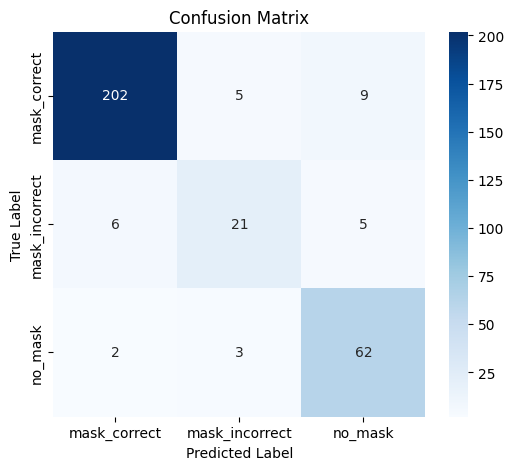

Overall Accuracy: 0.9047619047619048

Classification Report:

                precision    recall  f1-score   support

  mask_correct       0.96      0.94      0.95       216
mask_incorrect       0.72      0.66      0.69        32
       no_mask       0.82      0.93      0.87        67

      accuracy                           0.90       315
     macro avg       0.83      0.84      0.83       315
  weighted avg       0.91      0.90      0.90       315



In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Here I am comparing the validation (test set) accuracies of the model with the confusion matrix, to see if they are similar

# 1. Test images generator (no shuffle!)
test_set = test_datagen.flow_from_directory(
    'Downloads/ML Test/CNN/Mask/output/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

# 2. CNN Model evaluation 
val_loss, val_acc = model.evaluate(test_set)
print("Evaluate accuracy:", val_acc)

# 3. Predict on test set 
y_true = test_set.classes
y_pred_probs = model.predict(test_set)
y_pred = np.argmax(y_pred_probs, axis=1)

# 4. Confusion matrix
class_names = list(test_set.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Overall Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))